<a href="https://colab.research.google.com/github/Klearpixeloff/Hotel-booking-analysis/blob/main/Hotel_Booking_Anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

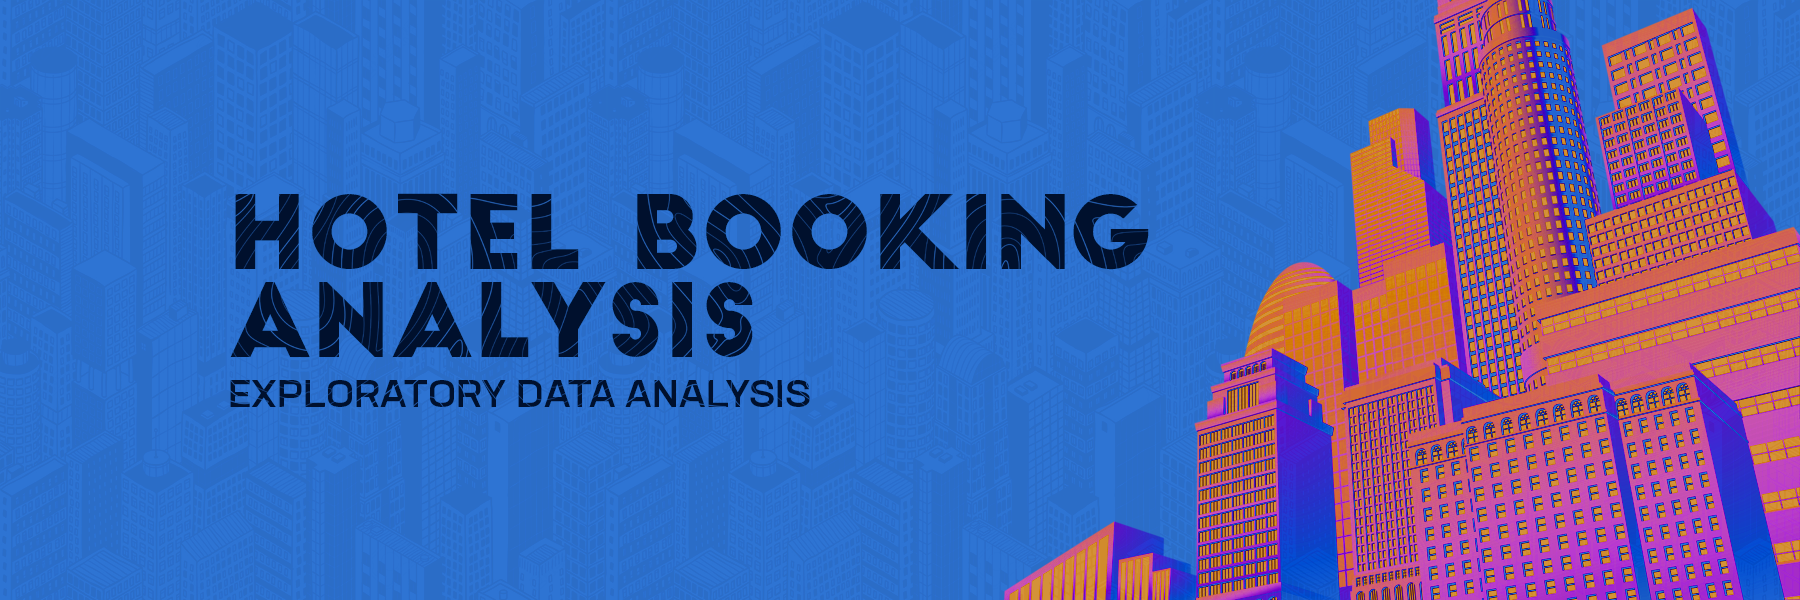

#**Project Name - Hotel Booking Anaylsis**#
NAME : ABHISHEK JAIN

NAME : KHUSHBOO CHAURASIYA

#**Github link**#

ABHISHEK JAIN   https://github.com/Klearpixeloff/Hotel-booking-analysis

KHUSHBOO CHAURASIYA  https://github.com/Geniuskhushboo/Hotel-Booking-Analysis



#**Import libraries**#

In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fl
from folium.plugins import HeatMap
import plotly.express as px

#**Load the Data**#

In [ ]:
#access the google drive
df = pd.read_csv('drive/MyDrive/Hotel Bookings.csv')


#**Description of Data Frame**#

In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#**Check null Values**#

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#**Find out and merge the essential columns**#


- is_repeated_guest


-  is_canceled

- required_car_parking_spaces

- arrival_date_month

- babies

- country


In [ ]:
new_df = df[['hotel','is_repeated_guest','is_canceled','required_car_parking_spaces','arrival_date_month','babies','country',]]

In [ ]:
new_df.head(5)

,hotel,is_repeated_guest,is_canceled,required_car_parking_spaces,arrival_date_month,babies,country
0,Resort Hotel,0,0,0,July,0,PRT
1,Resort Hotel,0,0,0,July,0,PRT
2,Resort Hotel,0,0,0,July,0,GBR
3,Resort Hotel,0,0,0,July,0,GBR
4,Resort Hotel,0,0,0,July,0,GBR


#**Description of New Data**#

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   hotel                        119390 non-null  object
 1   is_repeated_guest            119390 non-null  int64 
 2   is_canceled                  119390 non-null  int64 
 3   required_car_parking_spaces  119390 non-null  int64 
 4   arrival_date_month           119390 non-null  object
 5   babies                       119390 non-null  int64 
 6   country                      118902 non-null  object
dtypes: int64(4), object(3)
memory usage: 6.4+ MB


In [ ]:
new_df.describe()

,is_repeated_guest,is_canceled,required_car_parking_spaces,babies
count,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.031912,0.370416,0.062518,0.007949
std,0.175767,0.482918,0.245291,0.097436
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,8.000000,10.000000


In [ ]:
new_df['is_repeated_guest'].unique()

array([0, 1])

In [ ]:
new_df['is_canceled'].unique()

array([0, 1])

In [ ]:
new_df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [ ]:
new_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
new_df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [ ]:
new_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

#**Cleaning the Data**#

In [ ]:
new_df['babies'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: babies, Length: 119390, dtype: bool

In [ ]:
new_df['country'].isnull().sum()

488

In [ ]:
#replace null value with mode
new_df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
new_df['country'].fillna('PRT')

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   hotel                        119390 non-null  object
 1   is_repeated_guest            119390 non-null  int64 
 2   is_canceled                  119390 non-null  int64 
 3   required_car_parking_spaces  119390 non-null  int64 
 4   arrival_date_month           119390 non-null  object
 5   babies                       119390 non-null  int64 
 6   country                      118902 non-null  object
dtypes: int64(4), object(3)
memory usage: 6.4+ MB


#**Exploratory Data Analysis**#

#**From where the most guests are coming**#

In [ ]:
new_df.head()

,hotel,is_repeated_guest,is_canceled,required_car_parking_spaces,arrival_date_month,babies,country
0,Resort Hotel,0,0,0,July,0,PRT
1,Resort Hotel,0,0,0,July,0,PRT
2,Resort Hotel,0,0,0,July,0,GBR
3,Resort Hotel,0,0,0,July,0,GBR
4,Resort Hotel,0,0,0,July,0,GBR


In [ ]:
guests = new_df[new_df['is_canceled'] == 0]['country'].value_counts().reset_index()
guests.columns = ['country', 'No of guests']
guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
basemap = fl.Map()
guests_map = px.choropleth(guests, locations = guests['country'],
                           color = guests['No of guests'], hover_name = guests['country'])
guests_map.show()

#**which hotels are  good for babies**#

In [ ]:
new_df.head(5)

,hotel,is_repeated_guest,is_canceled,required_car_parking_spaces,arrival_date_month,babies,country
0,Resort Hotel,0,0,0,July,0,PRT
1,Resort Hotel,0,0,0,July,0,PRT
2,Resort Hotel,0,0,0,July,0,GBR
3,Resort Hotel,0,0,0,July,0,GBR
4,Resort Hotel,0,0,0,July,0,GBR


In [ ]:
new_df['babies'].value_counts()
#917

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [ ]:
new_df[new_df['is_canceled']==0]['babies'].value_counts()
#750

0     74416
1       735
2        13
10        1
9         1
Name: babies, dtype: int64

In [ ]:
npc = new_df[new_df['is_canceled']==0].groupby('hotel')['babies'].sum().reset_index()
npc

,hotel,babies
0,City Hotel,328
1,Resort Hotel,452


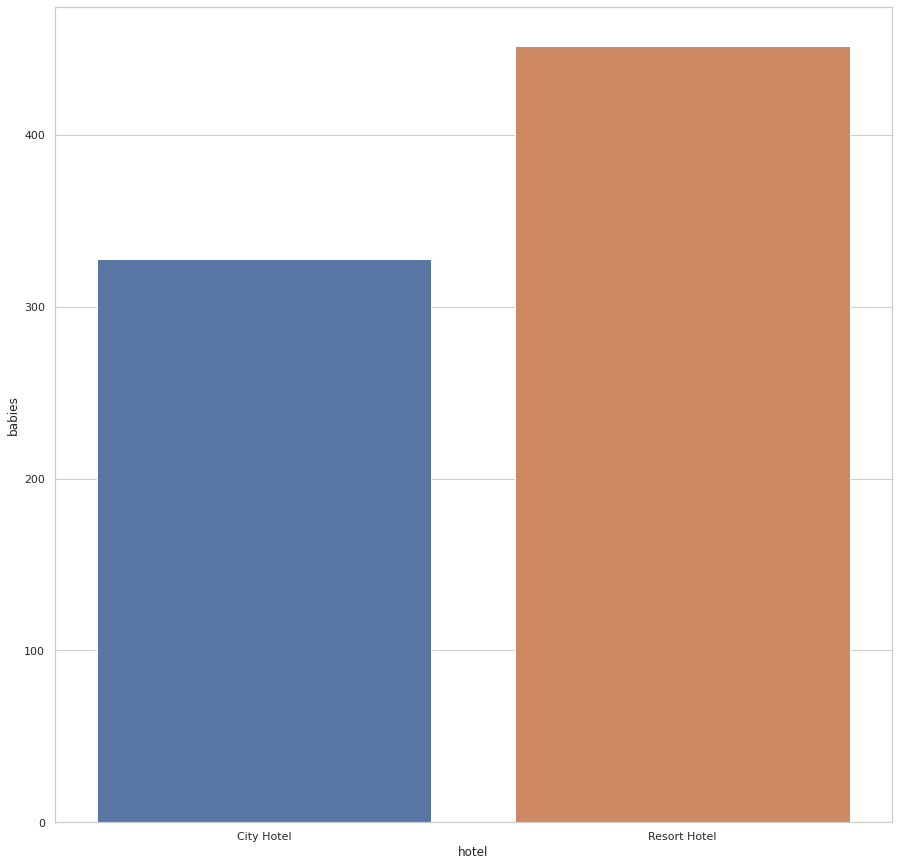

In [ ]:
sns.set_style("whitegrid")
cx= sns.barplot(x= "hotel", y='babies',data=npc)

#**which  month has more booking**#

In [ ]:
new_df.head(5)

,hotel,is_repeated_guest,is_canceled,required_car_parking_spaces,arrival_date_month,babies,country
0,Resort Hotel,0,0,0,July,0,PRT
1,Resort Hotel,0,0,0,July,0,PRT
2,Resort Hotel,0,0,0,July,0,GBR
3,Resort Hotel,0,0,0,July,0,GBR
4,Resort Hotel,0,0,0,July,0,GBR


In [ ]:
month_c = new_df[['arrival_date_month','hotel']].value_counts().reset_index()


In [ ]:
month_c.columns = ['month' , 'hotel' , 'number of booking']

In [ ]:
month_c

,month,hotel,number of booking
0,August,City Hotel,8983
1,May,City Hotel,8232
2,July,City Hotel,8088
3,June,City Hotel,7894
4,October,City Hotel,7605
5,April,City Hotel,7480
6,September,City Hotel,7400
7,March,City Hotel,6458
8,February,City Hotel,4965
9,August,Resort Hotel,4894


In [ ]:
dfg = month_c.groupby(['hotel', 'month'],as_index=False).agg({'number of booking':"sum"})

In [ ]:
dfg

,hotel,month,number of booking
0,City Hotel,April,7480
1,City Hotel,August,8983
2,City Hotel,December,4132
3,City Hotel,February,4965
4,City Hotel,January,3736
5,City Hotel,July,8088
6,City Hotel,June,7894
7,City Hotel,March,6458
8,City Hotel,May,8232
9,City Hotel,November,4357


In [ ]:
dfg.columns

Index(['hotel', 'month', 'number of booking'], dtype='object')

In [ ]:
city_hotel = dfg[dfg['hotel'] == 'City Hotel']

In [ ]:
city_hotel

,hotel,month,number of booking
0,City Hotel,April,7480
1,City Hotel,August,8983
2,City Hotel,December,4132
3,City Hotel,February,4965
4,City Hotel,January,3736
5,City Hotel,July,8088
6,City Hotel,June,7894
7,City Hotel,March,6458
8,City Hotel,May,8232
9,City Hotel,November,4357


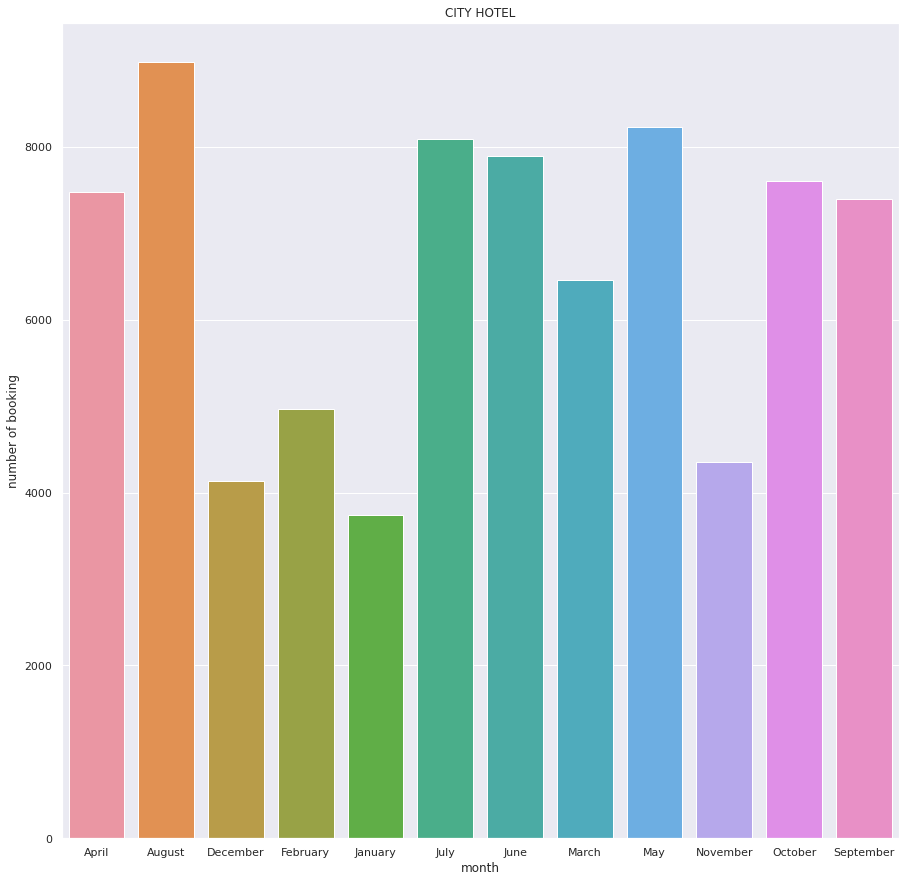

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,15)})
CV= sns.barplot(x= "month", y='number of booking',data=city_hotel).set(title='CITY HOTEL')

In [ ]:
Resort_Hotel = dfg[dfg['hotel'] == 'Resort Hotel']
Resort_Hotel

,hotel,month,number of booking
12,Resort Hotel,April,3609
13,Resort Hotel,August,4894
14,Resort Hotel,December,2648
15,Resort Hotel,February,3103
16,Resort Hotel,January,2193
17,Resort Hotel,July,4573
18,Resort Hotel,June,3045
19,Resort Hotel,March,3336
20,Resort Hotel,May,3559
21,Resort Hotel,November,2437


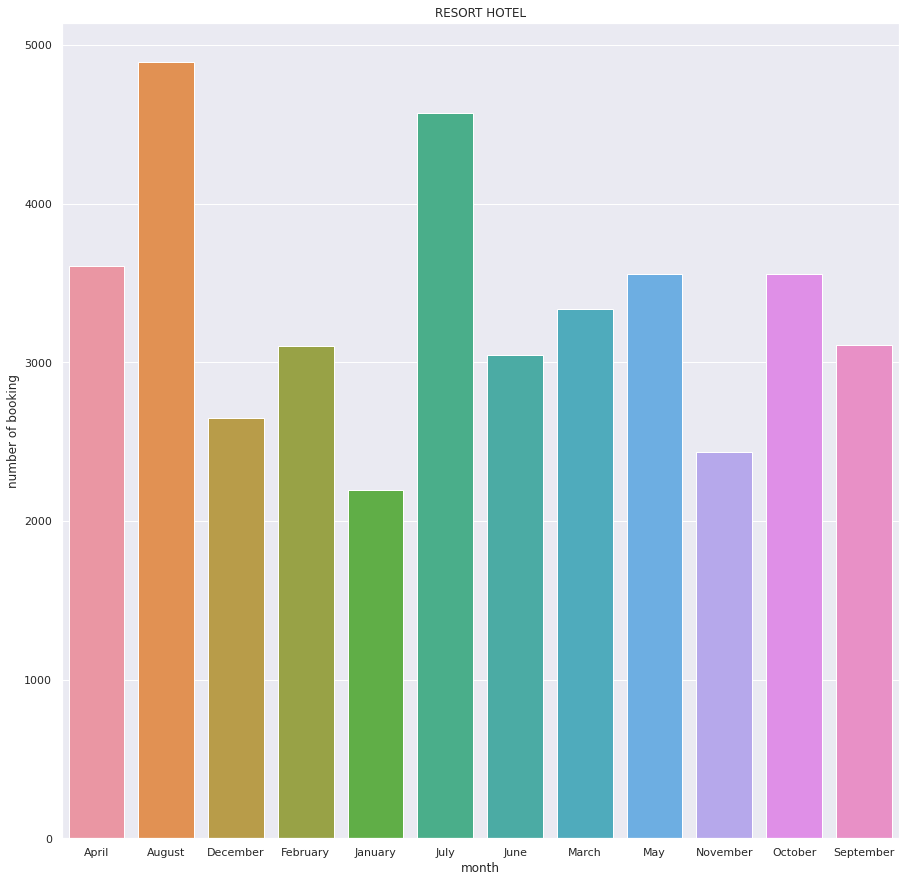

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,15)})
CV= sns.barplot(x= "month", y='number of booking',data=Resort_Hotel).set(title='RESORT HOTEL')

#**which hotels have more parking spaces**#

In [ ]:
new_df.head()

,hotel,is_repeated_guest,is_canceled,required_car_parking_spaces,arrival_date_month,babies,country
0,Resort Hotel,0,0,0,July,0,PRT
1,Resort Hotel,0,0,0,July,0,PRT
2,Resort Hotel,0,0,0,July,0,GBR
3,Resort Hotel,0,0,0,July,0,GBR
4,Resort Hotel,0,0,0,July,0,GBR


In [ ]:
parking = new_df.groupby(['hotel'],as_index=True).agg({'required_car_parking_spaces':"sum"})

In [ ]:
parking

,required_car_parking_spaces
hotel,
City Hotel,1933
Resort Hotel,5531


Text(0.5, 0, 'hotels')

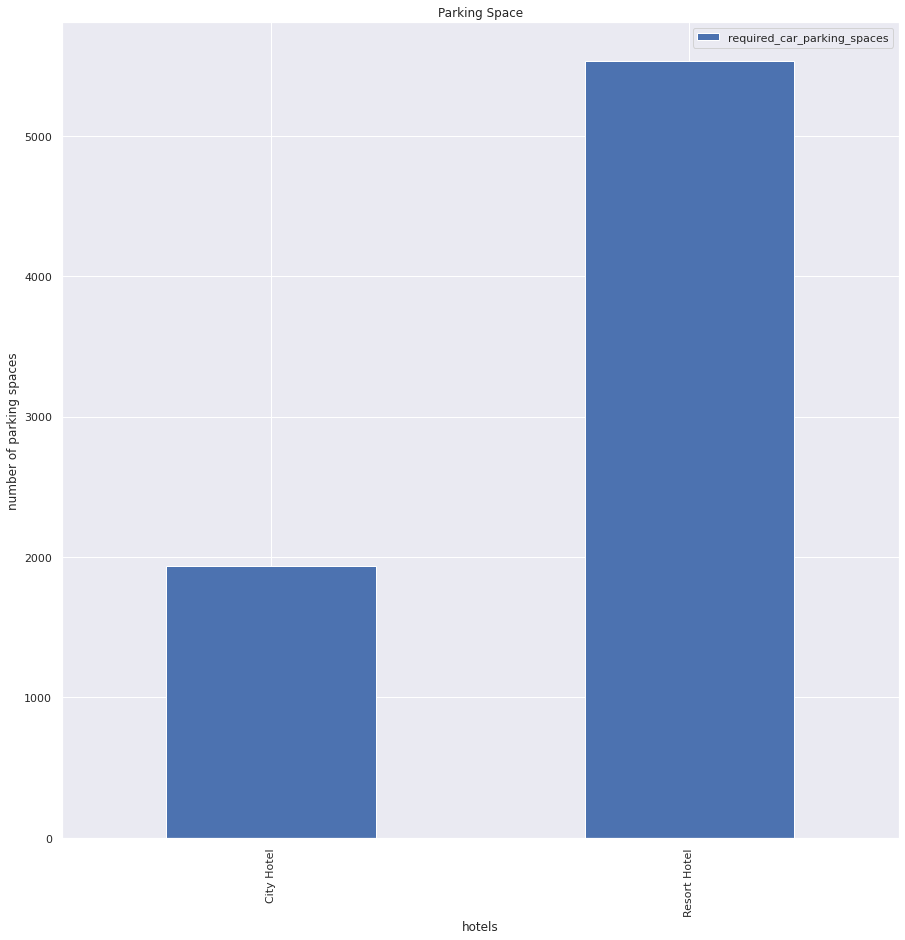

In [ ]:
parking.plot(kind='bar')
plt.title('Parking Space')
plt.ylabel('number of parking spaces')
plt.xlabel('hotels')

#**which hotels has more repeated  customers**#

In [ ]:
new_df.head(5)

,hotel,is_repeated_guest,is_canceled,required_car_parking_spaces,arrival_date_month,babies,country
0,Resort Hotel,0,0,0,July,0,PRT
1,Resort Hotel,0,0,0,July,0,PRT
2,Resort Hotel,0,0,0,July,0,GBR
3,Resort Hotel,0,0,0,July,0,GBR
4,Resort Hotel,0,0,0,July,0,GBR


In [ ]:
repeat = new_df.groupby(['hotel'],as_index=True).agg({'is_repeated_guest' : "sum"	})

In [ ]:
repeat

,is_repeated_guest
hotel,
City Hotel,2032
Resort Hotel,1778


Text(0, 0.5, 'Number of repeat customer')

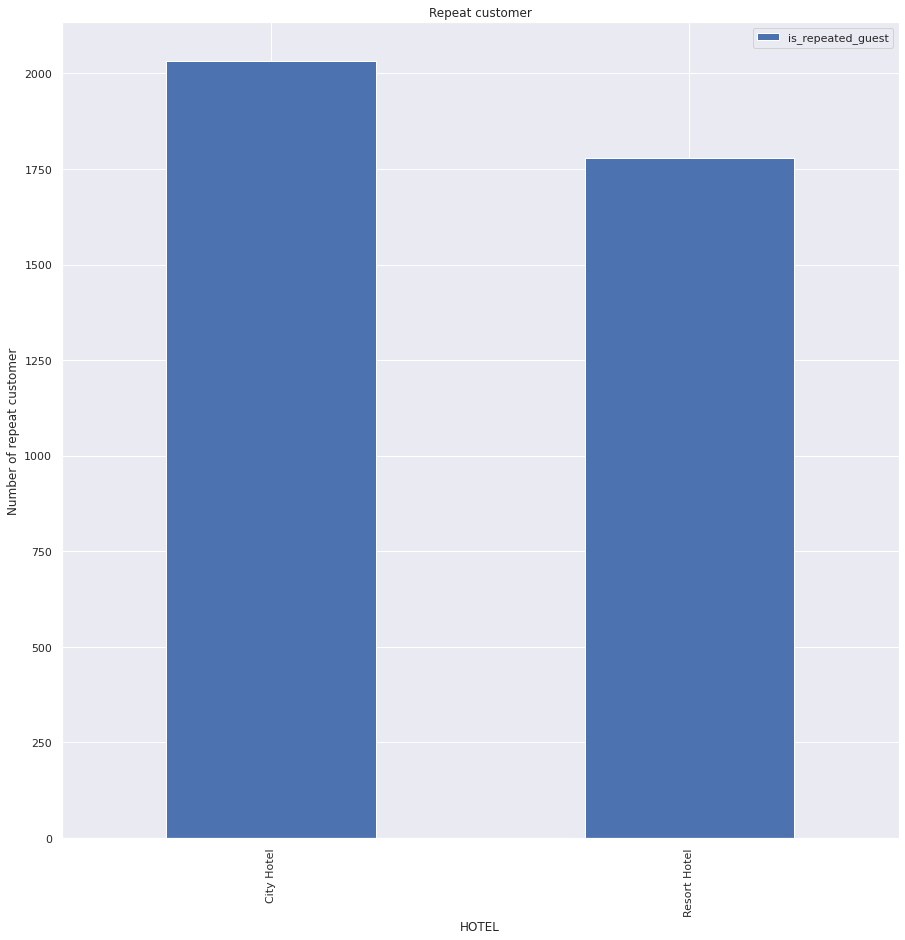

In [ ]:
repeat.plot(kind='bar')
plt.title('Repeat customer')
plt.xlabel('HOTEL')
plt.ylabel('Number of repeat customer')